In [1]:
!curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.2/julia-1.2.0-linux-x86_64.tar.gz" -o julia.tar.gz
!tar -xzf julia.tar.gz -C /usr --strip-components 1
!rm -rf julia.tar.gz*
!julia -e 'using Pkg; pkg"add IJulia; precompile"'

   Cloning default registries into `~/.julia`
   Cloning registry from "https://github.com/JuliaRegistries/General.git"
     Added registry `General` to `~/.julia/registries/General`
 Resolving package versions...
 Installed VersionParsing ── v1.2.0
 Installed Parsers ───────── v1.0.2
 Installed MbedTLS ───────── v0.7.0
 Installed ZMQ ───────────── v1.1.0
 Installed IJulia ────────── v1.21.2
 Installed Conda ─────────── v1.4.1
 Installed BinaryProvider ── v0.5.8
 Installed JSON ──────────── v0.21.0
 Installed SoftGlobalScope ─ v1.0.10
  Updating `~/.julia/environments/v1.2/Project.toml`
  [7073ff75] + IJulia v1.21.2
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [b99e7846] + BinaryProvider v0.5.8
  [8f4d0f93] + Conda v1.4.1
  [7073ff75] + IJulia v1.21.2
  [682c06a0] + JSON v0.21.0
  [739be429] + MbedTLS v0.7.0
  [69de0a69] + Parsers v1.0.2
  [b85f4697] + SoftGlobalScope v1.0.10
  [81def892] + VersionParsing v1.2.0
  [c2297ded] + ZMQ v1.1.0
  [2a0f44e3] + Base64 
  [ade2ca70] +

In [1]:
versioninfo()

Julia Version 1.2.0
Commit c6da87ff4b (2019-08-20 00:03 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)


In [2]:
using Pkg
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("LsqFit")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed Missings ─────────── v0.4.3
 Installed Showoff ──────────── v0.3.1
 Installed DataAPI ──────────── v1.2.0
 Installed RecipesPipeline ──── v0.1.4
 Installed Plots ────────────── v1.0.14
 Installed Contour ──────────── v0.5.2
 Installed Colors ───────────── v0.12.0
 Installed StatsBase ────────── v0.33.0
 Installed RecipesBase ──────── v1.0.0
 Installed Reexport ─────────── v0.2.0
 Installed Measures ─────────── v0.3.1
 Installed FixedPointNumbers ── v0.8.0
 Installed Requires ─────────── v1.0.1
 Installed OrderedCollections ─ v1.1.0
 Installed FFMPEG ───────────── v0.2.4
 Installed DataStructures ───── v0.17.13
 Installed NaNMath ──────────── v0.3.3
 Installed StaticArrays ─────── v0.12.1
 Installed ColorTypes ───────── v0.10.2
 Installed SortingAlgorithms ── v0.3.1
 Installed GeometryTypes ────── v0.8.2
 Installed PlotUtils 

In [3]:
using Plots, Random, LsqFit
@. model(x, p) = p[1] / (1 + ℯ^(p[2] * x + p[3]))
x = range(0, step = 0.5, length = 200)
p = [1.0, -0.5, 10]
y = model(x, p)

y_obs = model(x, p) + 0.01 * randn(length(x))
p_est = [0.5, -0.3, 5.0]

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242
┌ Info: Precompiling LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
└ @ Base loading.jl:1242


3-element Array{Float64,1}:
  0.5
 -0.3
  5.0

In [14]:
using Plots, Random, LsqFit
@. model(x, p) = p[1] * cos(x) + p[2] * x * sin(x)
x = range(0, step = 0.5, length = 500)
p = [3.0, 0.2]
y = model(x, p)

y_obs = model(x, p) + 0.01 * randn(length(x))
p_est = [0.5, -0.2]

2-element Array{Float64,1}:
  0.5
 -0.2

┌ Info: Saved animation to 
│   fn = /content/tmp.gif
└ @ Plots /root/.julia/packages/Plots/8GUYs/src/animation.jl:102


Plots.AnimatedGif("/content/tmp.gif")
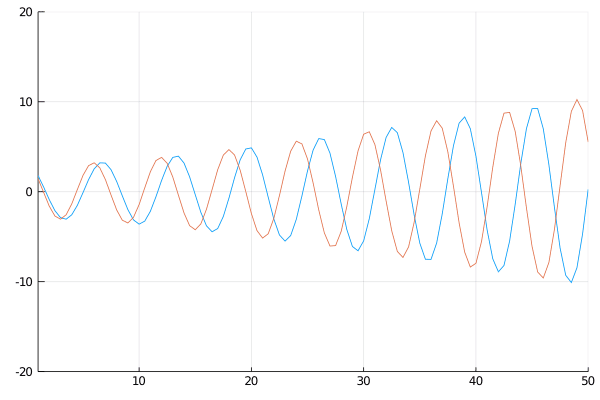

In [15]:
anim = @animate for i =1:500
    fit = curve_fit(model, x[1:i], y_obs[1:i], p_est)
    plot(x, y, xlims = (1, 50), ylims = (-20, 20), legend = false)
    plot!(x, model(x, fit.param))
    scatter!(x[1:i], y_obs[1:i], m = :x)
    vline!([x[i]], style = :dash)
end
gif(anim, fps = 15)